In [1]:
#Import libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

In [2]:
#Process datasets
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
#Train network
model= models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [4]:
#Predict and show accuracy and confusion matrix
y_test_hat_mat = model.predict(test_images)
y_test_hat = np.argmax(y_test_hat_mat, axis=1)
print(accuracy_score(test_labels, y_test_hat))
cm = confusion_matrix(test_labels, y_test_hat)

0.8965


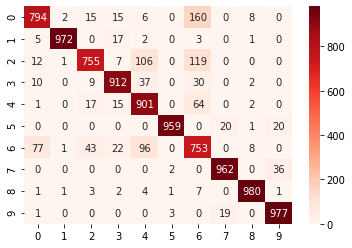

In [5]:
# Visualize confusion matrix
sn.heatmap(cm, annot = True, fmt="d", cmap = 'Reds')